In [ ]:
import numpy as np 
import pandas as pd 

pd.options.display.max_columns = 100

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/content/Breast_cancer_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
data = pd.read_csv("/content/Breast_cancer_data.csv")

In [ ]:
len(data.index), len(data.columns)

(569, 6)

In [ ]:
data.shape

(569, 6)

In [ ]:
data.head()
# daignosis here is telling us about being the diagnosed outcome, i.e if outcomes is 0 it represents it is non cancerous.

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
data.isna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [ ]:
data.isna().any()

mean_radius        False
mean_texture       False
mean_perimeter     False
mean_area          False
mean_smoothness    False
diagnosis          False
dtype: bool

In [ ]:
data.isna().sum() 

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
data = data.dropna(axis='columns')

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(data.dtypes)


mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object


In [ ]:
data.describe(include="int64")

,diagnosis
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
data.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
data.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0


In [ ]:
diagnosis_unique = data.diagnosis.unique()
diagnosis_unique

array([0, 1])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


<Axes: xlabel='diagnosis', ylabel='count'>

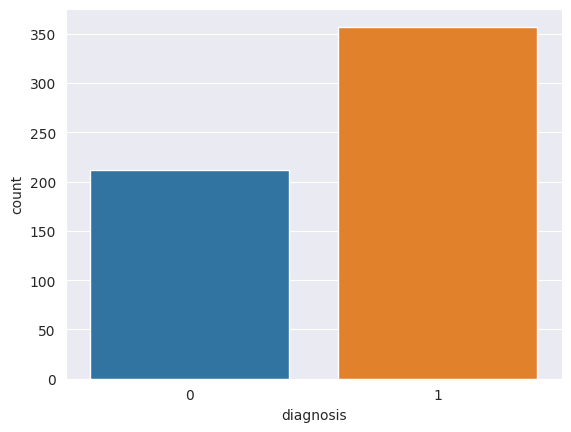

In [ ]:
import seaborn as sns

sns.countplot(x='diagnosis', data=data)

In [ ]:
px.histogram(data, x='diagnosis')

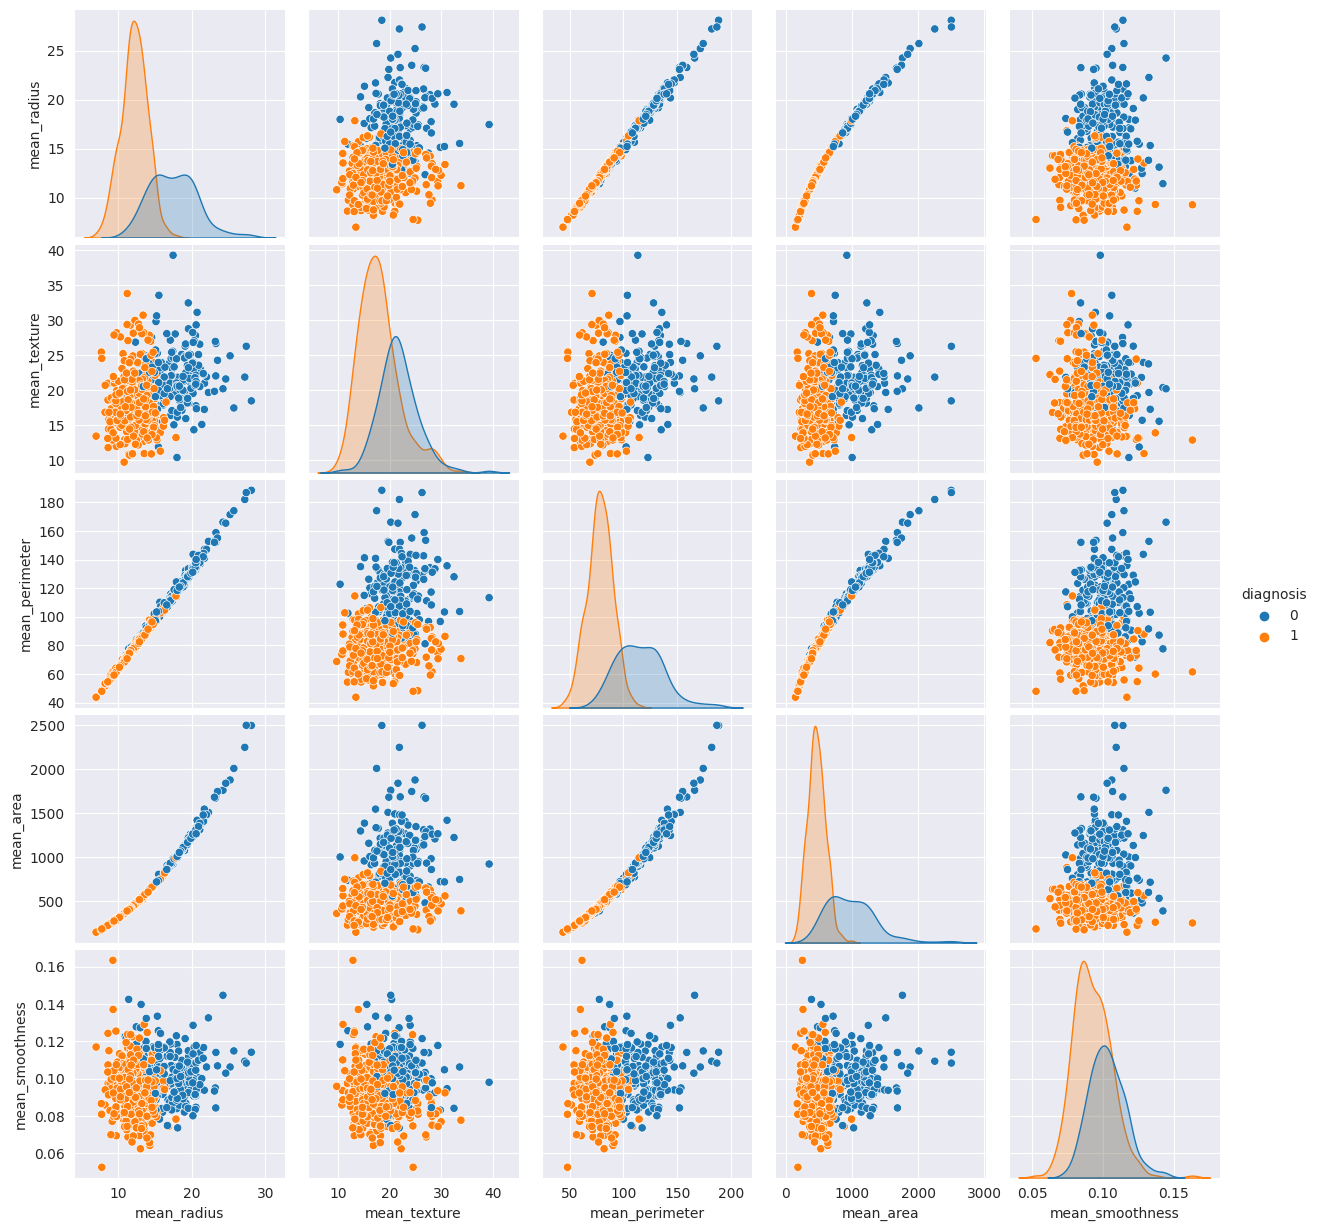

In [ ]:
cols = ["diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area","mean_smoothness"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

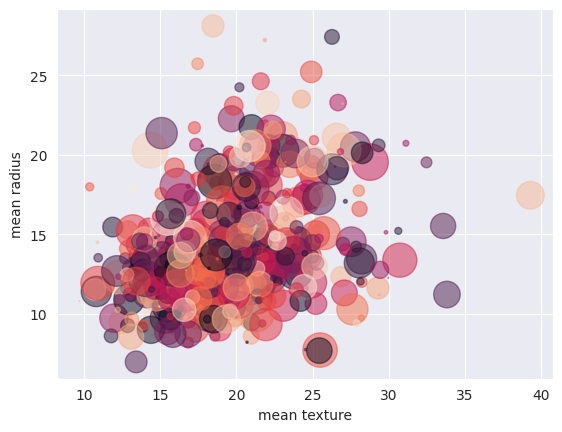

In [ ]:
size = len(data['mean_texture'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("mean texture")
plt.ylabel("mean radius") 
plt.scatter(data['mean_texture'], data['mean_radius'], s=area, c=colors, alpha=0.5);

# here mean textture and radius means the nucleas of cancerous cells.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0


In [ ]:
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [ ]:
data.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0


In [ ]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

1    357
0    212
Name: diagnosis, dtype: int64

 569


In [ ]:
cols = ['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness']
print(len(cols))
data[cols].corr()

6


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560
mean_radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581
mean_texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389
mean_perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278
mean_area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028
mean_smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000


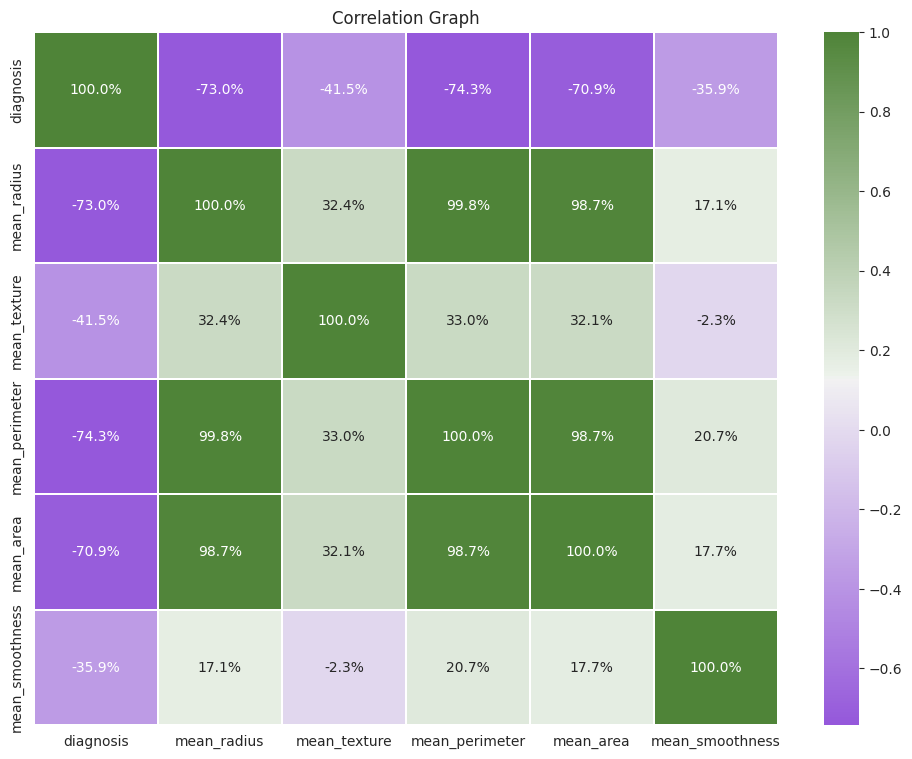

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [ ]:
plt.figure(figsize=(15, 10))


fig = px.imshow(data[cols].corr());
fig.show()

<Figure size 1500x1000 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

In [ ]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
prediction_feature = [ "mean_radius",  'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_texture']

targeted_feature = 'diagnosis'

len(prediction_feature)

5

In [ ]:
X = data[prediction_feature]
X

,mean_radius,mean_perimeter,mean_area,mean_smoothness,mean_texture
0,17.99,122.80,1001.0,0.11840,10.38
1,20.57,132.90,1326.0,0.08474,17.77
2,19.69,130.00,1203.0,0.10960,21.25
3,11.42,77.58,386.1,0.14250,20.38
4,20.29,135.10,1297.0,0.10030,14.34
...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11100,22.39
565,20.13,131.20,1261.0,0.09780,28.25
566,16.60,108.30,858.1,0.08455,28.08
567,20.60,140.10,1265.0,0.11780,29.33


In [ ]:
y = data.diagnosis
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)

     mean_radius  mean_perimeter  mean_area  mean_smoothness  mean_texture
274        17.93          115.20      998.9          0.08855         24.48
189        12.30           78.83      463.7          0.08080         15.90
158        12.06           76.84      448.6          0.09311         12.74
257        15.32          103.20      713.3          0.13350         17.27
486        14.64           94.21      666.0          0.08641         16.85
..           ...             ...        ...              ...           ...
85         18.46          121.10     1075.0          0.09874         18.52
199        14.45           94.49      642.7          0.09872         20.22
156        17.68          117.40      963.7          0.11150         20.74
384        13.28           85.79      541.8          0.08363         13.72
456        11.63           74.87      415.1          0.09357         29.29

[381 rows x 5 columns]


In [ ]:
# Scale the data to keep all the values in the same magnitude of 0 -1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    

In [ ]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

In [ ]:
print(list(models_list.keys()))
print(list(models_list.values()))


['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [ ]:
# Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
        

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        73
           1       0.92      0.96      0.94       115

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        73
           1       0.89      0.95      0.92       115

    accuracy                           0.90       188
   macro avg       0.90      0.88      0.89       188
weighted avg       0.90      0.90      0.90       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        73
           1       0.88      0.96      0.92       115

    accuracy            

In [ ]:
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

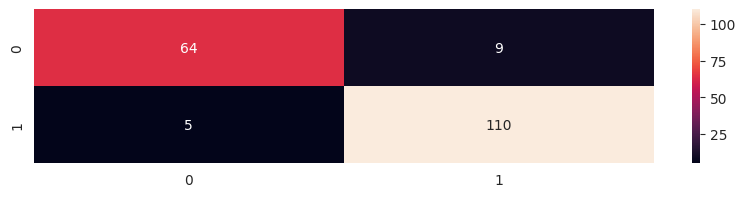

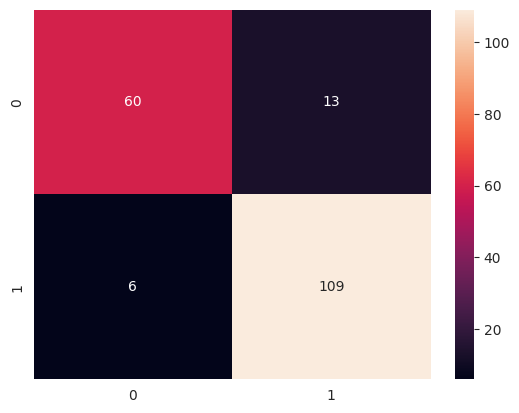

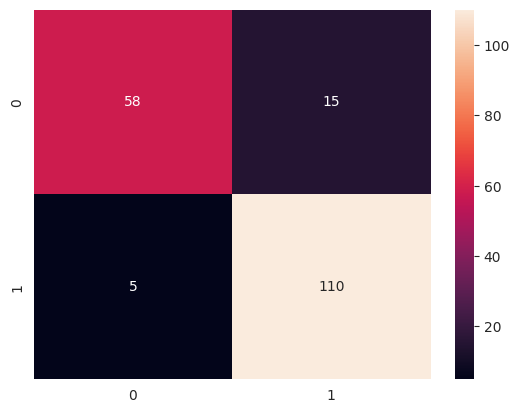

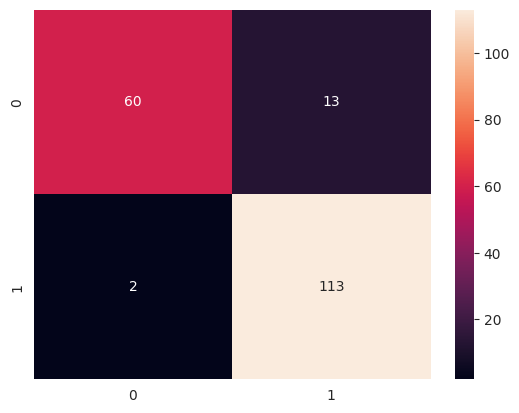

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 2))
# plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):
#     plt.xlabel("Negative Positive")
#     plt.ylabel("True Positive")

    
    
    # Show The Metrics Graph    
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)

In [ ]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.939633,0.925532,92.55%
1,RandomForestClassifier,0.994751,0.898936,89.89%
2,DecisionTreeClassifier,1.000000,0.893617,89.36%
3,SVC,0.947507,0.920213,92.02%


In [ ]:
df_pred.sort_values('score', ascending=False)
# df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,DecisionTreeClassifier,1.000000,0.893617,89.36%
1,RandomForestClassifier,0.994751,0.898936,89.89%
3,SVC,0.947507,0.920213,92.02%
0,LogisticRegression,0.939633,0.925532,92.55%


In [ ]:
len(data)
# print(len(X))

569

In [ ]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.019492,0.009116,0.010040,0.015123,0.020206,0.024217,0.028229
score_time,3.0,0.002428,0.000234,0.002158,0.002358,0.002557,0.002563,0.002569
test_r2,3.0,0.556531,0.084363,0.460291,0.525944,0.591597,0.604651,0.617706
train_r2,3.0,0.642877,0.007414,0.638596,0.638596,0.638596,0.645017,0.651438
test_neg_mean_squared_error,3.0,-0.103676,0.019817,-0.126316,-0.110777,-0.095238,-0.092356,-0.089474
train_neg_mean_squared_error,3.0,-0.083481,0.001648,-0.084433,-0.084433,-0.084433,-0.083006,-0.081579


In [ ]:
def cross_val_scorring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

 # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [ ]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/


Full-Data Accuracy: 0.91
Cross Validation Score of'LogisticRegression '

Score: 0.93
Score: 0.92
Score: 0.92
Score: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Score: 0.91

Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.9
Score: 0.88
Score: 0.88
Score: 0.88


In [ ]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
# Let's Implement Grid Search Algorithm

# Pick the model

model = DecisionTreeClassifier()

# Tunning Params
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn


 Best Score is 
0.9186909581646423

 Best Estinator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=9)

 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



In [ ]:
# Pick the model
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9500674763832657

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=10)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 10, 'weights': 'uniform'}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create the grid search object with the desired estimator and hyperparameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X, y)

# Print the best estimator
print("\nBest Estimator:")
print(grid_search.best_estimator_)

# Print the best parameters
print("\nBest Parameters:")
print(grid_search.best_params_)



Best Estimator:
SVC(C=10, kernel='linear')

Best Parameters:
{'C': 10, 'kernel': 'linear'}


In [ ]:
# Assuming you have imported the necessary libraries and defined the model
import pickle
from sklearn.linear_model import LogisticRegression

# Define and assign values to X_train and Y_train
X_train = [[1, 2], [3, 381]]  # Example input features
Y_train = [[381], [3]]  # Example output labels

# Initialize and fit the model with the training data
model = LogisticRegression()
model.fit(X_train, Y_train)

# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Define and assign values to X_test and Y_test
X_test = [[7, 8], [9, 10]]  # Example test data features
Y_test = [[0], [1]]  # Example test data labels

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
import pickle as pkl

In [ ]:
import numpy as np

print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))


Shape of X_train: (2, 2)
Shape of y_train: (381,)


In [ ]:
# Trainned Model # You can also use your own trainned model
logistic_model = LogisticRegression()

filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

In [ ]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)